# Problem 1

Solving problem 1 using R in jupyter lab. Documentation is written in a separate pdf file.

-------------------


### a)

Extract data from https://www.uio.no/studier/emner/matnat/math/STK4900/data/no2.txt 

In [1]:
data = read.table("https://www.uio.no/studier/emner/matnat/math/STK4900/data/no2.txt", header=T)

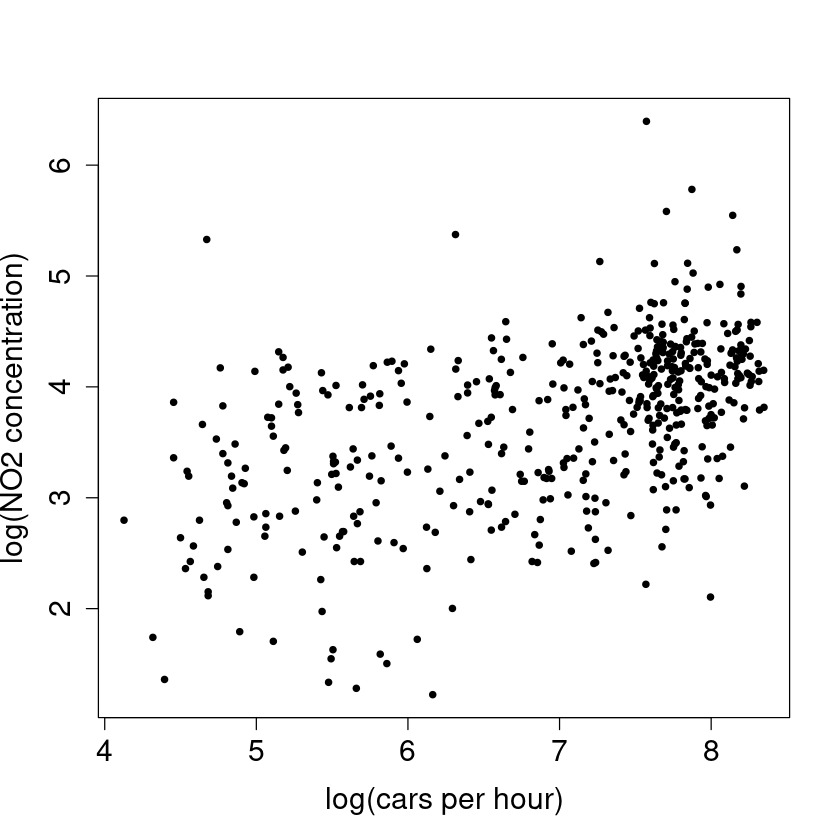

In [2]:
#pdf(file="plot_1a.pdf")
plot(log.no2~log.cars, data=data, pch=19,
     xlab="log(cars per hour)", ylab="log(NO2 concentration)",
     cex.lab=1.5, cex.axis=1.5, cex=0.7)
#dev.off()

---------------------------

### b)


Call:
lm(formula = log.no2 ~ log.cars, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18822 -0.40071  0.06428  0.40362  2.48472 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23310    0.18755   6.575 1.23e-10 ***
log.cars     0.35353    0.02657  13.303  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6454 on 498 degrees of freedom
Multiple R-squared:  0.2622,	Adjusted R-squared:  0.2607 
F-statistic:   177 on 1 and 498 DF,  p-value: < 2.2e-16


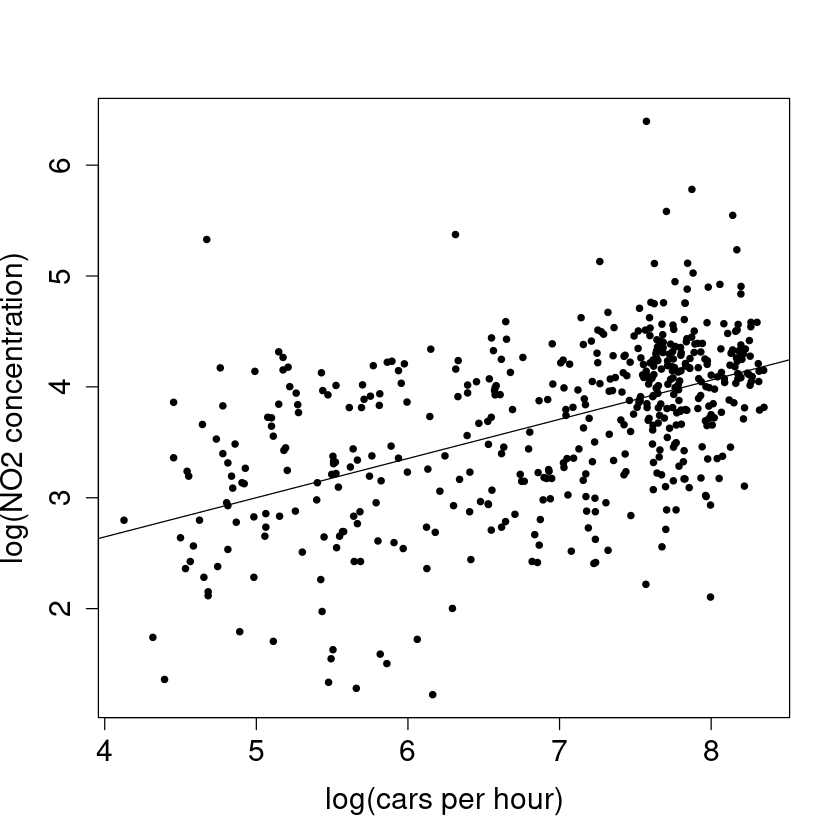

In [3]:
#pdf(file="plot_1b.pdf")
plot(log.no2~log.cars, data=data, pch=19,
     xlab="log(cars per hour)", ylab="log(NO2 concentration)",
     cex.lab=1.5, cex.axis=1.5, cex=0.7)

fit = lm(log.no2~log.cars, data=data)
abline(fit)
summary(fit)

#dev.off()

---------------------------

### c)

Check of linearity

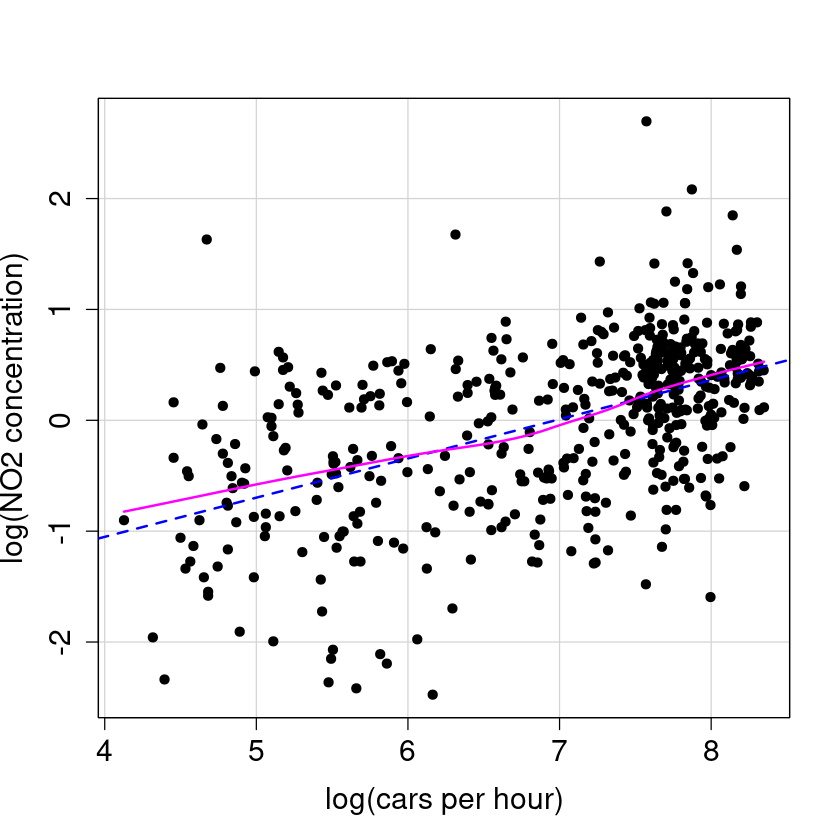

In [7]:
library(car)

#pdf(file="plot_1c_linearity.pdf")
crPlots(fit, terms=~log.cars, pch=19,
     xlab="log(cars per hour)", ylab="log(NO2 concentration)",
     cex.lab=1.5, cex.axis=1.5, cex=0.7)

#fit.sq = lm(log.no2~log.cars+I(log.cars^2), data=data)
#crPlots(fit.sq, terms=~log.cars, pch=19,
#     cex.lab=1.5, cex.axis=1.5, cex=0.7)
#crPlots(fit.sq, terms=~I(log.cars^2), pch=19,
#     cex.lab=1.5, cex.axis=1.5, cex=0.7)
#dev.off()

Check of constant variance

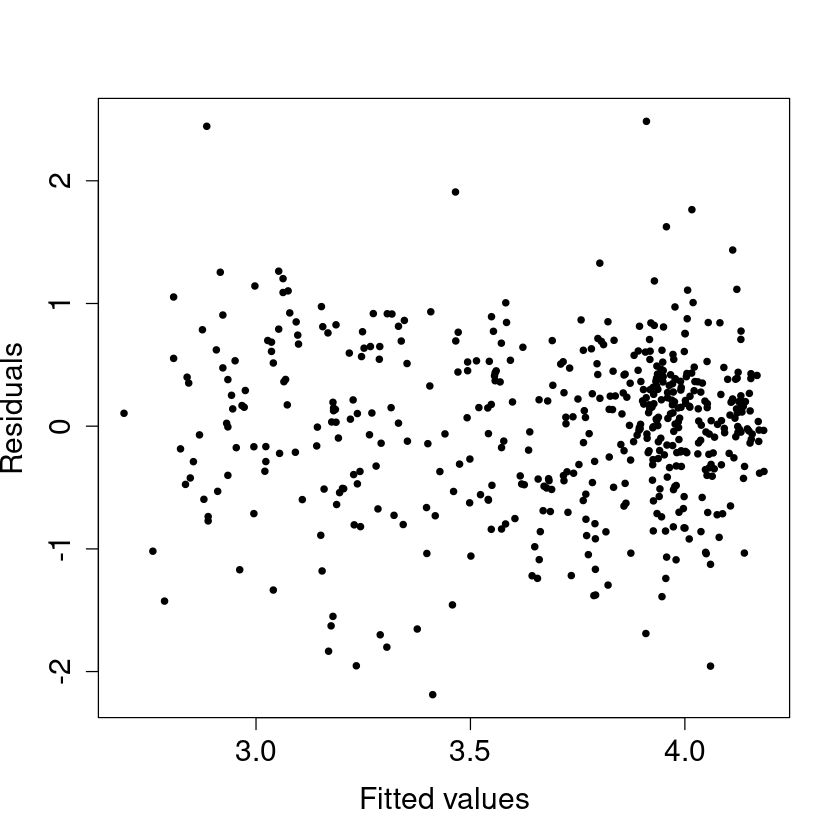

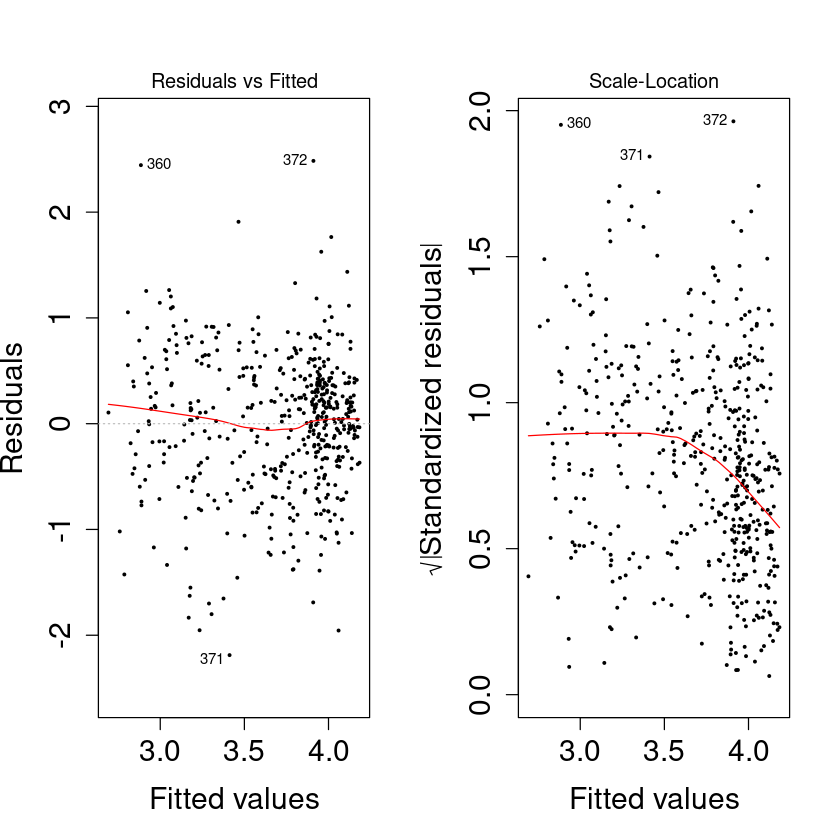

In [8]:
#pdf(file="plot_1c_constant_variance.pdf")
plot(fit$fit, fit$res, pch=19,
     xlab="Fitted values", ylab="Residuals",
     cex.lab=1.5, cex.axis=1.5, cex=0.7)
#dev.off()

#pdf(file="plot_1c_constant_variance2.pdf")
par(mfrow=c(1,2))
plot(fit,1, pch=19, cex.lab=1.5, cex.axis=1.5, cex=0.3)
plot(fit,3, pch=19, cex.lab=1.5, cex.axis=1.5, cex=0.3)
#dev.off()

Check of normality

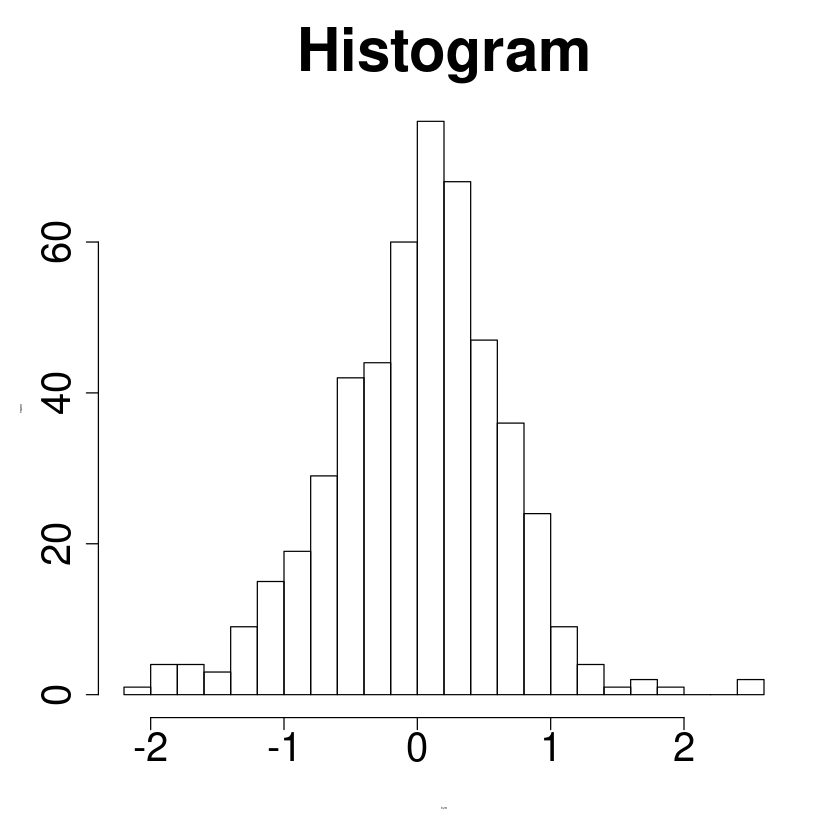

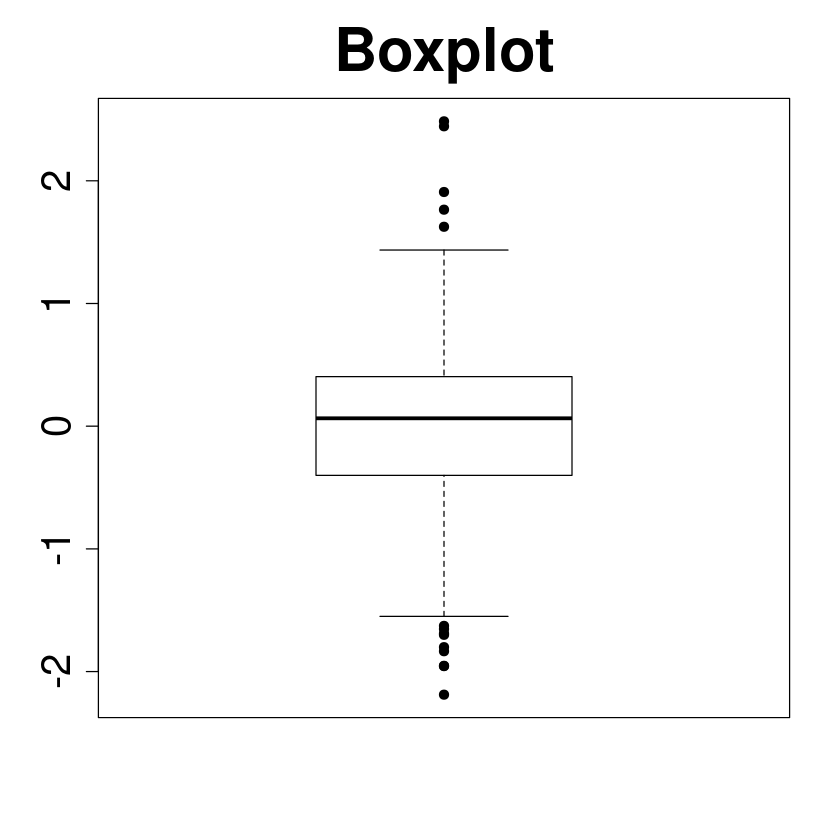

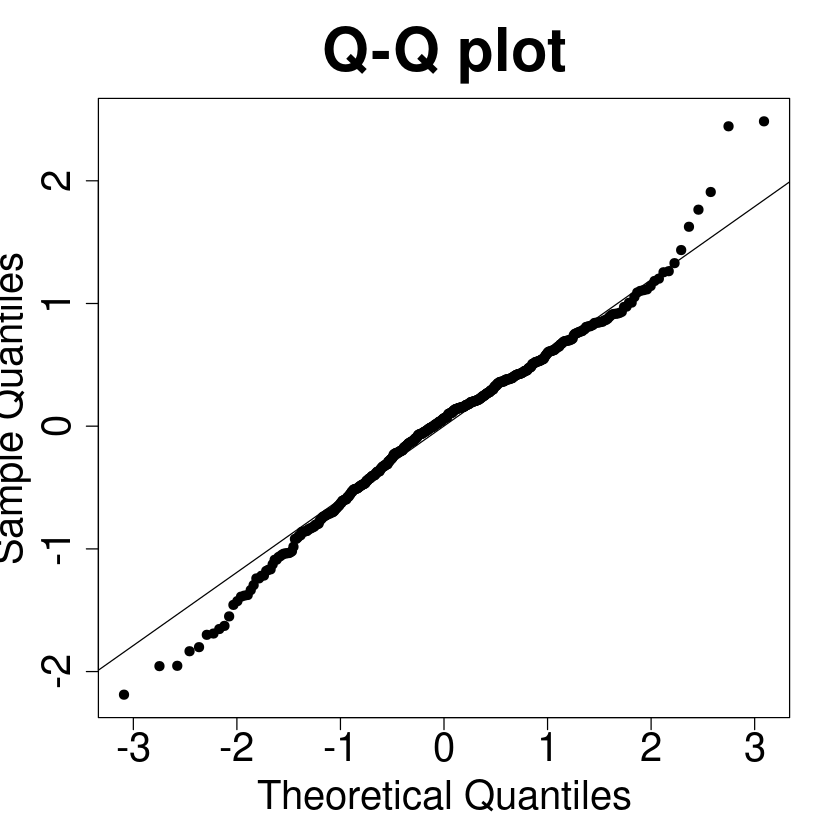

In [9]:
#pdf(file="plot_1c_normality_histogram.pdf")
hist(fit$res, pch=19, main="Histogram", breaks=20,
     cex.lab=0.1, cex.axis=2, cex.main=3)
#dev.off()

#pdf(file="plot_1c_normality_boxplot.pdf")
boxplot(fit$res, pch=19, main="Boxplot",
     cex.lab=0.1, cex.axis=2, cex.main=3)
#dev.off()

#pdf(file="plot_1c_normality_QQplot.pdf")
qqnorm(fit$res, pch=19, main="Q-Q plot",
     cex.lab=2, cex.axis=2, cex.main=3)
qqline(fit$res)
#dev.off()

---------------------------

### d)

In [13]:
cor(data)

,log.no2,log.cars,temp,wind.speed,hour.of.day
log.no2,1.0000000,0.51205042,-0.1681592,-0.328834938,0.246201259
log.cars,0.5120504,1.00000000,0.2018317,0.097530682,0.576856715
temp,-0.1681592,0.20183175,1.0000000,0.165990712,0.079484997
wind.speed,-0.3288349,0.09753068,0.1659907,1.000000000,-0.002789753
hour.of.day,0.2462013,0.57685671,0.0794850,-0.002789753,1.000000000


In [40]:
# fitting model with and without hour.of.day
#fit.multiple = lm(log.no2 ~ log.cars + temp + wind.speed + hour.of.day, data=data)
fit.multiple = lm(log.no2 ~ log.cars + temp + wind.speed + hour.of.day, data=data)
summary(fit.multiple)

print("---------------------------------------------------------------------------")

fit.multiple = lm(log.no2 ~ log.cars + temp + wind.speed, data=data)
summary(fit.multiple)


Call:
lm(formula = log.no2 ~ log.cars + temp + wind.speed + hour.of.day, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24876 -0.32070  0.03084  0.33860  1.96057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.152131   0.175045   6.582 1.19e-10 ***
log.cars     0.456974   0.028411  16.084  < 2e-16 ***
temp        -0.026855   0.003905  -6.877 1.85e-11 ***
wind.speed  -0.149334   0.014076 -10.609  < 2e-16 ***
hour.of.day -0.013025   0.004452  -2.926   0.0036 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5508 on 495 degrees of freedom
Multiple R-squared:  0.4658,	Adjusted R-squared:  0.4615 
F-statistic: 107.9 on 4 and 495 DF,  p-value: < 2.2e-16


[1] "---------------------------------------------------------------------------"



Call:
lm(formula = log.no2 ~ log.cars + temp + wind.speed, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13980 -0.33142  0.04882  0.35257  1.97666 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.316491   0.167043   7.881 2.07e-14 ***
log.cars     0.409026   0.023384  17.492  < 2e-16 ***
temp        -0.026447   0.003932  -6.725 4.83e-11 ***
wind.speed  -0.146594   0.014152 -10.359  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.555 on 496 degrees of freedom
Multiple R-squared:  0.4566,	Adjusted R-squared:  0.4533 
F-statistic: 138.9 on 3 and 496 DF,  p-value: < 2.2e-16


In [34]:
# fitting model with the log of variables and also with and without hour.of.day
fit.multiple.log = lm(log.no2 ~ log.cars + temp + log(wind.speed) + log(hour.of.day), data=data)
summary(fit.multiple.log)

print("---------------------------------------------------------------------------")

fit.multiple.log = lm(log.no2 ~ log.cars + temp + log(wind.speed), data=data)
summary(fit.multiple.log)


Call:
lm(formula = log.no2 ~ log.cars + temp + log(wind.speed) + log(hour.of.day), 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26406 -0.31784  0.04366  0.34532  1.83379 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.111953   0.169410   6.564 1.33e-10 ***
log.cars          0.461040   0.031041  14.852  < 2e-16 ***
temp             -0.026922   0.003853  -6.988 9.07e-12 ***
log(wind.speed)  -0.415333   0.036410 -11.407  < 2e-16 ***
log(hour.of.day) -0.098007   0.041880  -2.340   0.0197 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5431 on 495 degrees of freedom
Multiple R-squared:  0.4807,	Adjusted R-squared:  0.4766 
F-statistic: 114.6 on 4 and 495 DF,  p-value: < 2.2e-16


[1] "---------------------------------------------------------------------------"



Call:
lm(formula = log.no2 ~ log.cars + temp + log(wind.speed), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07759 -0.33892  0.05458  0.36666  1.83266 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.229009   0.162586   7.559 1.98e-13 ***
log.cars         0.411979   0.022995  17.916  < 2e-16 ***
temp            -0.026304   0.003861  -6.813 2.79e-11 ***
log(wind.speed) -0.414496   0.036572 -11.334  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5455 on 496 degrees of freedom
Multiple R-squared:  0.475,	Adjusted R-squared:  0.4718 
F-statistic: 149.6 on 3 and 496 DF,  p-value: < 2.2e-16


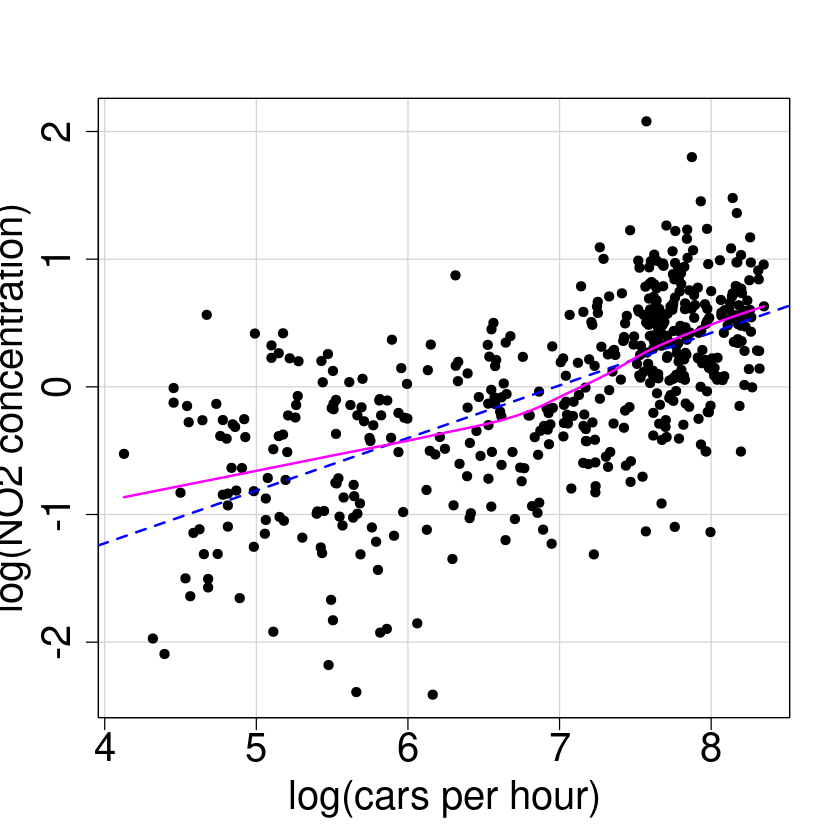

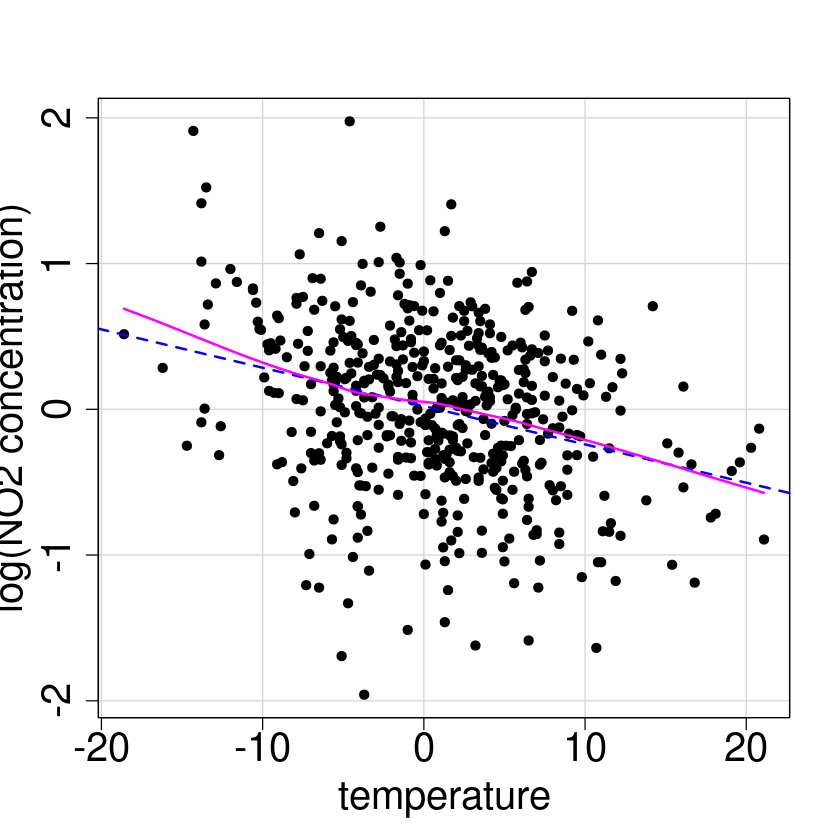

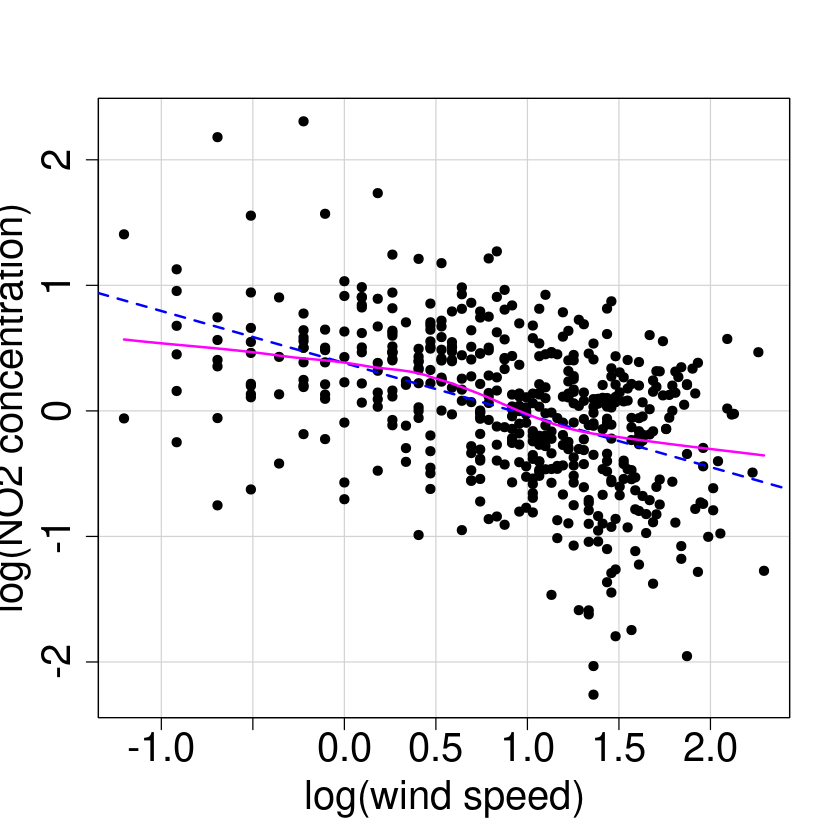

In [49]:
#pdf(file="plot_1d_linearity_logcars.pdf")
crPlots(fit.multiple.log, terms=~log.cars, pch=19,
     xlab="log(cars per hour)", ylab="log(NO2 concentration)",
     cex.lab=2, cex.axis=2, cex.main=3)
#dev.off()

#pdf(file="plot_1d_linearity_temp.pdf")
crPlots(fit.multiple.log, terms=~temp, pch=19,
     xlab="temperature", ylab="log(NO2 concentration)",
     cex.lab=2, cex.axis=2, cex.main=3)
#dev.off()

#pdf(file="plot_1d_linearity_log_windspeed.pdf")
crPlots(fit.multiple.log, terms=~log(wind.speed), pch=19,
     xlab="log(wind speed)", ylab="log(NO2 concentration)",
     cex.lab=2, cex.axis=2, cex.main=3)
#dev.off()